<a href="https://colab.research.google.com/github/ennakratizak/alx-pre_course/blob/main/TP_N%C2%B01_Algorithme_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1 : Importation des bibliothèques nécessaires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [ ]:
#2 : Chargement et exploration du jeu de données California Housing

print("Chargement du jeu de données California Housing...")
housing = fetch_california_housing()

Chargement du jeu de données California Housing...


In [ ]:
# Conversion en DataFrame pandas pour faciliter la manipulation
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['target'] = housing.target
# La cible est le prix médian des logements (en centaines de milliers de dollars)

In [ ]:
print("\nAperçu des premières lignes du jeu de données:")
df_housing.head()


Aperçu des premières lignes du jeu de données:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
print("\nInformations sur le jeu de données:")
print(f"Nombre d'échantillons: {df_housing.shape[0]}")
print(f"Nombre de caractéristiques: {df_housing.shape[1] - 1}") # -1 pour exclure la colonne cible


Informations sur le jeu de données:
Nombre d'échantillons: 20640
Nombre de caractéristiques: 8


In [ ]:
print("\nDescription statistique des données:")
df_housing.describe()


Description statistique des données:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [ ]:
# 3. Préparation des données pour l'entraînement

# Séparation des caractéristiques (X) et de la variable cible (y)
X = df_housing.drop('target', axis=1)
y = df_housing['target']
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Taille de l'ensemble d'entraînement: {X_train.shape[0]} échantillons")
print(f"Taille de l'ensemble de test: {X_test.shape[0]} échantillons")

Taille de l'ensemble d'entraînement: 16512 échantillons
Taille de l'ensemble de test: 4128 échantillons


In [ ]:
#4. Entraînement du modèle Random Forest pour la régression

print("\nEntraînement du modèle Random Forest pour la régression...")
# Création et entraînement du modèle
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print("Modèle entraîné avec succès!")


Entraînement du modèle Random Forest pour la régression...
Modèle entraîné avec succès!


In [ ]:
# 5. Évaluation du modèle

print("\nÉvaluation du modèle sur l'ensemble de test...")
# Prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_test)
# Calcul des métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE): {mse:.4f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse:.4f}")
print(f"Erreur absolue moyenne (MAE): {mae:.4f}")
print(f"Coefficient de détermination (R2): {r2:.4f}")


Évaluation du modèle sur l'ensemble de test...
Erreur quadratique moyenne (MSE): 0.2554
Racine de l'erreur quadratique moyenne (RMSE): 0.5053
Erreur absolue moyenne (MAE): 0.3275
Coefficient de détermination (R2): 0.8051


In [ ]:
#6. Analyse de l'importance des variables

print("\nAnalyse de l'importance des variables...")
# Extraction et affichage de l'importance des variables
feature_importances = rf_model.feature_importances_
features = X.columns


Analyse de l'importance des variables...


In [ ]:
# Création d'un DataFrame pour faciliter la visualisation
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)

print("Importance des variables:")
for i, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


Importance des variables:
MedInc: 0.5249
AveOccup: 0.1384
Latitude: 0.0889
Longitude: 0.0886
HouseAge: 0.0546
AveRooms: 0.0443
Population: 0.0306
AveBedrms: 0.0296


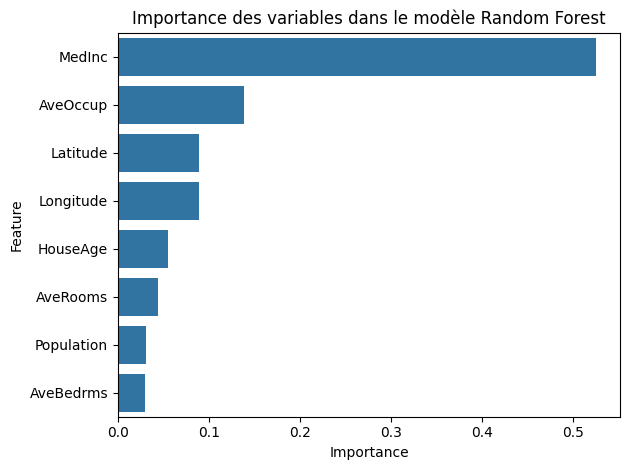

In [ ]:
# Visualisation de l'importance des variables
plt.figure()
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Importance des variables dans le modèle Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
# 7. Sauvegarde du modèle entraîné

print("\nSauvegarde du modèle entraîné...")
joblib.dump(rf_model, 'random_forest_regression_model.pkl')
print("Modèle sauvegardé sous 'random_forest_regression_model.pkl'")


Sauvegarde du modèle entraîné...
Modèle sauvegardé sous 'random_forest_regression_model.pkl'


In [ ]:
# Exercice 2


#1 : Importation des bibliothèques nécessaires

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import joblib

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ventes_nissan_qashqai.csv to ventes_nissan_qashqai.csv


In [46]:
# Afficher les premières lignes
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
# 1. Load the data
data = pd.read_csv('ventes_nissan_qashqai.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ventes_nissan_qashqai.csv to ventes_nissan_qashqai (1).csv


In [ ]:
# Afficher les premières lignes
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  
